# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

from sklearn.metrics import r2_score




### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=2000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 740


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | paradwip
City not found. Skipping...
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | wajid
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | torbay
Processing Record 7 of Set 1 | alice springs
Processing Record 8 of Set 1 | chokurdakh
Processing Record 9 of Set 1 | banff
Processing Record 10 of Set 1 | egvekinot
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | nouakchott
Processing Record 14 of Set 1 | port elizabeth
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | pacific grove
Processing Record 18 of Set 1 | apac
Processing Record 19 of Set 1 | hilo
Processing Record 20 of Set 1 | camacha
Processing Record 21

Processing Record 35 of Set 4 | kaitangata
Processing Record 36 of Set 4 | katsuura
Processing Record 37 of Set 4 | kieta
Processing Record 38 of Set 4 | lander
Processing Record 39 of Set 4 | hoa binh
Processing Record 40 of Set 4 | columbus
Processing Record 41 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 4 | avera
Processing Record 43 of Set 4 | inirida
Processing Record 44 of Set 4 | zyryanovsk
Processing Record 45 of Set 4 | katherine
Processing Record 46 of Set 4 | kanniyakumari
Processing Record 47 of Set 4 | coquimbo
Processing Record 48 of Set 4 | margate
Processing Record 49 of Set 4 | rungata
City not found. Skipping...
Processing Record 0 of Set 5 | dayong
Processing Record 1 of Set 5 | labuhan
Processing Record 2 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 3 of Set 5 | tessalit
Processing Record 4 of Set 5 | yanaul
Processing Record 5 of Set 5 | beyneu
Processing Record 6 of Set 5 | galich
Processing Record 7 of Set 5 | b

Processing Record 27 of Set 8 | tungkang
City not found. Skipping...
Processing Record 28 of Set 8 | cleburne
Processing Record 29 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 30 of Set 8 | bolshaya martynovka
Processing Record 31 of Set 8 | mahibadhoo
Processing Record 32 of Set 8 | luderitz
Processing Record 33 of Set 8 | mullaitivu
City not found. Skipping...
Processing Record 34 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 35 of Set 8 | masoko
Processing Record 36 of Set 8 | saint anthony
Processing Record 37 of Set 8 | pemangkat
Processing Record 38 of Set 8 | klyuchevskiy
Processing Record 39 of Set 8 | cascais
Processing Record 40 of Set 8 | kloulklubed
Processing Record 41 of Set 8 | kaz
Processing Record 42 of Set 8 | okha
Processing Record 43 of Set 8 | polunochnoye
Processing Record 44 of Set 8 | sinjar
Processing Record 45 of Set 8 | bajil
Processing Record 46 of Set 8 | ayagoz
Processing Record 47 of Set 8 | yambio
Processing 

Processing Record 16 of Set 12 | yokadouma
Processing Record 17 of Set 12 | road town
Processing Record 18 of Set 12 | tommot
Processing Record 19 of Set 12 | krasnovishersk
Processing Record 20 of Set 12 | cabo san lucas
Processing Record 21 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 22 of Set 12 | nanga eboko
Processing Record 23 of Set 12 | kendari
Processing Record 24 of Set 12 | mogadishu
Processing Record 25 of Set 12 | touros
Processing Record 26 of Set 12 | byron bay
Processing Record 27 of Set 12 | serpukhov
Processing Record 28 of Set 12 | aripuana
Processing Record 29 of Set 12 | srednekolymsk
Processing Record 30 of Set 12 | maracacume
Processing Record 31 of Set 12 | warrnambool
Processing Record 32 of Set 12 | cerritos
Processing Record 33 of Set 12 | kaliganj
Processing Record 34 of Set 12 | malanje
Processing Record 35 of Set 12 | abu samrah
Processing Record 36 of Set 12 | skibbereen
Processing Record 37 of Set 12 | camargo
Processing Record 38 o

Processing Record 0 of Set 16 | itajuba
Processing Record 1 of Set 16 | sri aman
Processing Record 2 of Set 16 | khasan
Processing Record 3 of Set 16 | kuytun
Processing Record 4 of Set 16 | taltal
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          697
Lat           697
Lng           697
Max Temp      697
Humidity      697
Cloudiness    697
Wind Speed    697
Country       697
Date          697
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bengkulu,-3.8004,102.2655,23.99,86,100,4.75,ID,1672413933
1,wajid,3.8093,43.2471,31.30,23,5,5.78,SO,1672413933
2,arraial do cabo,-22.9661,-42.0278,22.98,100,100,5.14,BR,1672413933
3,torbay,47.6666,-52.7314,-1.90,77,75,5.66,CA,1672413934
4,alice springs,-23.7000,133.8833,27.75,51,75,3.09,AU,1672413934


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bengkulu,-3.8004,102.2655,23.99,86,100,4.75,ID,1672413933
1,wajid,3.8093,43.2471,31.30,23,5,5.78,SO,1672413933
2,arraial do cabo,-22.9661,-42.0278,22.98,100,100,5.14,BR,1672413933
3,torbay,47.6666,-52.7314,-1.90,77,75,5.66,CA,1672413934
4,alice springs,-23.7000,133.8833,27.75,51,75,3.09,AU,1672413934


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

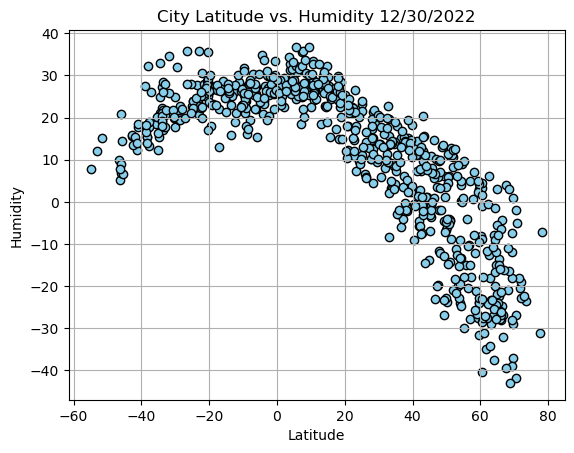

In [17]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="skyblue")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

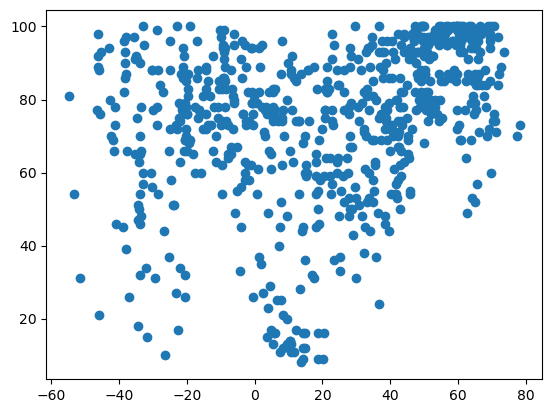

In [18]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

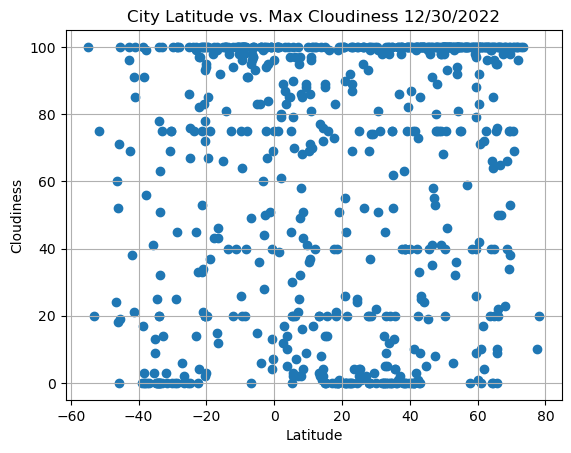

In [19]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

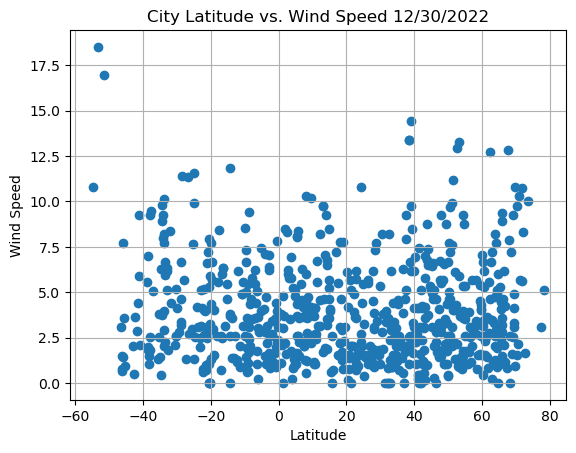

In [21]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def lrplot(x,y):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)

    line = slope*x+intercept
    plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    #end

    plt.scatter(x,y, color="k", s=3.5)
    plt.legend(fontsize=9)

    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0].copy()
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wajid,3.8093,43.2471,31.30,23,5,5.78,SO,1672413933
3,torbay,47.6666,-52.7314,-1.90,77,75,5.66,CA,1672413934
5,chokurdakh,70.6333,147.9167,-41.90,100,69,2.14,RU,1672413934
6,banff,51.1762,-115.5698,-4.43,79,100,2.06,CA,1672413832
7,egvekinot,66.3167,-179.1667,-24.85,87,100,4.62,RU,1672413935


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df=city_data_df[city_data_df["Lat"]<0].copy()
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bengkulu,-3.8004,102.2655,23.99,86,100,4.75,ID,1672413933
2,arraial do cabo,-22.9661,-42.0278,22.98,100,100,5.14,BR,1672413933
4,alice springs,-23.7000,133.8833,27.75,51,75,3.09,AU,1672413934
8,cape town,-33.9258,18.4232,27.23,46,0,8.23,ZA,1672413688
10,port elizabeth,-33.9180,25.5701,22.28,54,20,7.72,ZA,1672413935


###  Temperature vs. Latitude Linear Regression Plot

-0.8678754632659832


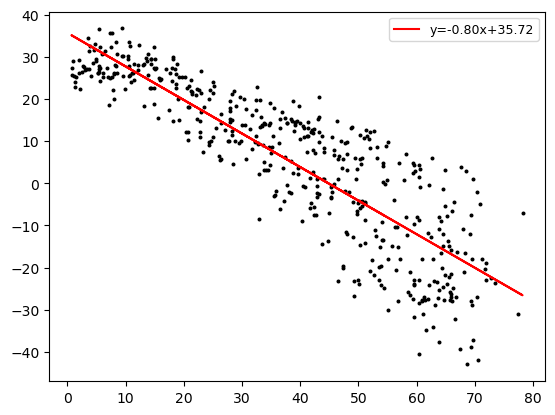

In [42]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Max Temp"]
print(x.corr(y))
lrplot(x,y)


0.5777309528696161


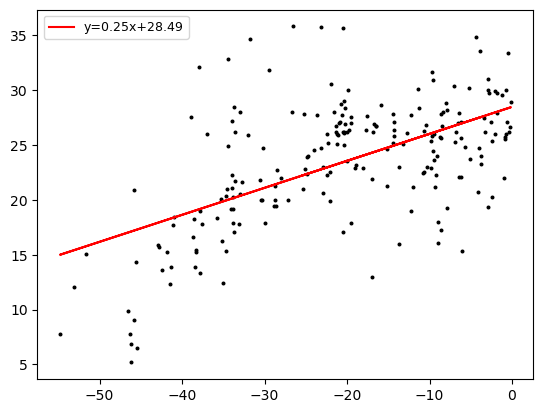

In [43]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Max Temp"]
print(x.corr(y))
lrplot(x,y)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

0.5393714045309387


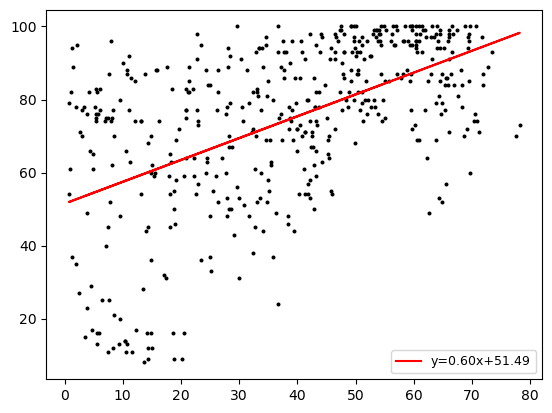

In [44]:
# Northern Hemisphere
# YOUR CODE HERE
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Humidity"]
print(x.corr(y))
lrplot(x,y)


0.14282228046560463


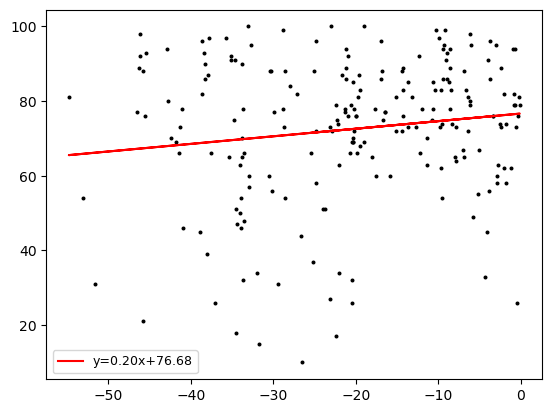

In [45]:
# Southern Hemisphere
# YOUR CODE HERE
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Humidity"]
print(x.corr(y))
lrplot(x,y)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

0.25062558361489295


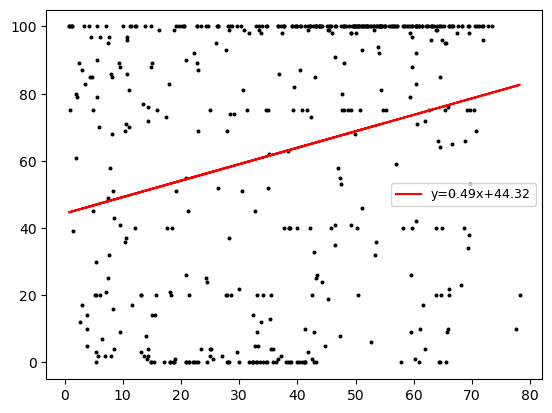

In [46]:
# Northern Hemisphere
# YOUR CODE HERE
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Cloudiness"]
print(x.corr(y))
lrplot(x,y)


0.33893460891254523


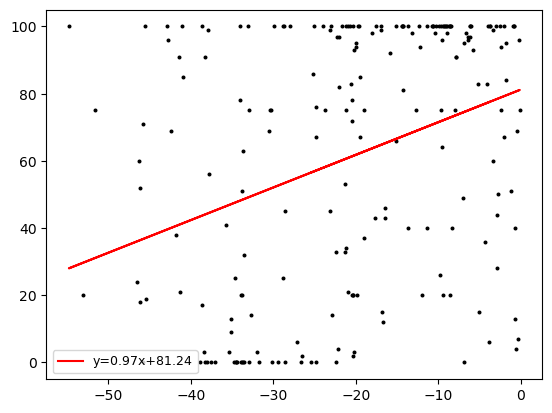

In [47]:
# Southern Hemisphere
# YOUR CODE HERE
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Cloudiness"]
print(x.corr(y))
lrplot(x,y)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

0.06007999270931802


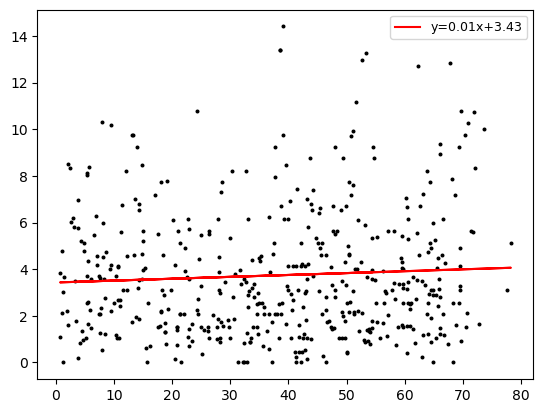

In [48]:
# Northern Hemisphere
# YOUR CODE HERE
x=northern_hemi_df["Lat"]
y=northern_hemi_df["Wind Speed"]
print(x.corr(y))
lrplot(x,y)

-0.22514587530487518


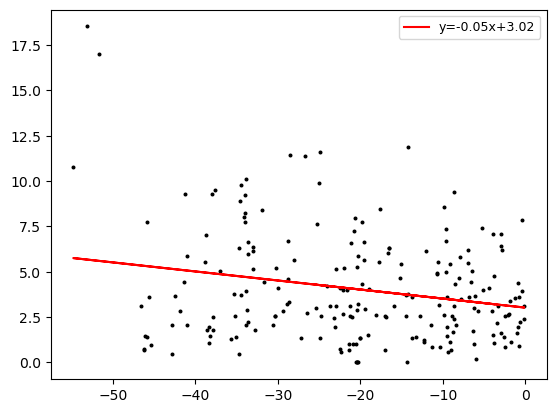

In [49]:
# Southern Hemisphere
# YOUR CODE HERE
x=southern_hemi_df["Lat"]
y=southern_hemi_df["Wind Speed"]
print(x.corr(y))
lrplot(x,y)

**Discussion about the linear relationship:** YOUR RESPONSE HERE